In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from quant_met import hamiltonians
from quant_met.minimize_free_energy import minimize_loop
from quant_met import plotting
from quant_met.bcs import find_fixpoint

In [2]:
lattice_constant = np.sqrt(3)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

Gamma = np.array([0, 0])
M = np.pi / lattice_constant * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * lattice_constant) * np.array([1, 0])

#egx_h = hamiltonians.EGXHamiltonian(t_gr=1, t_x=0.01, V=0, a=lattice_constant, mu=-2.5, U_gr=1, U_x=1)
graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=-1, coulomb_gr=2)

#mat = egx_h.diagonalize_bdg(K, [1, 1, 1])
with np.printoptions(suppress=True, precision=3):
    bdg_energies, w_matrix = graphene_h.diagonalize_bdg(Gamma, [1, 2])
    
print(bdg_energies)

[-4.40157512 -2.37194782  2.37194782  4.40157512]


In [13]:
BZ_grid = find_fixpoint.generate_k_space_grid(4, 4, all_K_points[1], all_K_points[5])

print(all_K_points[1])

#BZ_grid_plot = plotting.plot_into_bz(all_K_points, BZ_grid)

[2.41839915e+00 1.48084239e-16]


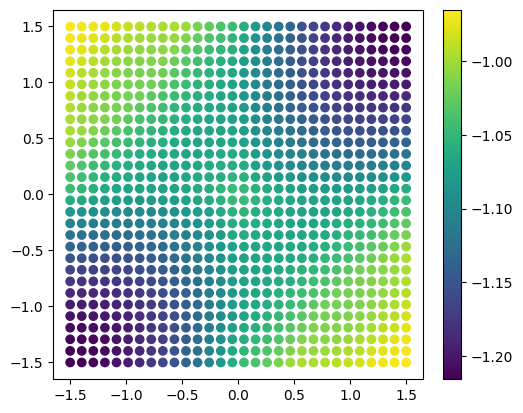

In [35]:
from quant_met.minimize_free_energy import free_energy

beta = 100

data = []

graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=0, coulomb_gr=4)

def generate_k_space_grid(nx, nrows, corner_1, corner_2, origin):
    k_points = np.concatenate(
        [
            np.linspace(
                origin[0] + i / (nrows - 1) * corner_2,
                origin[1] + corner_1 + i / (nrows - 1) * corner_2,
                num=nx,
            )
            for i in range(nrows)
        ]
    )

    return k_points

delta_list = generate_k_space_grid(30, 30, np.array([0, 3]), np.array([3, 0]), origin=np.array([-1.5, -1.5]))

for delta in delta_list:
    data.append(free_energy(delta_vector=delta, beta=beta, hamiltonian=graphene_h, k_points=BZ_grid))

fig, ax = plt.subplots()

scatter = ax.scatter(*zip(*delta_list), c=data, cmap="viridis")
fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

ax.set_aspect("equal", adjustable="box")